# Working with Matplotlib

Previous IPython Notebook Tutorial: [02_instagram_analyze_Data_Cleaning](https://github.com/odubno/instagram_analyzer/blob/master/IPython_Notebook_Files/02_instagram_analyze_Data_Cleaning.ipynb)

Here, we'll be pulling all of our previous scripts together to extract and clean data from instagram in order to create matplotlib graphs.

In [1]:
import requests
import requests
from pandas.io.json import json_normalize
import pandas as pd
import datetime

def instagram_data(query):
    base_url = "https://api.instagram.com/v1"
    CLIENT_ID = '768fcf1f36c94eb08506bae0a9caffa31' #fake id
    url = '{0}/tags/{1}/media/recent?client_id={2}&count=30'.format(
        base_url, query, CLIENT_ID)
    r = requests.get(url)
    j = r.json()   
    results = []
    if 'data' in j: 
        data = j['data']
        df_instance = json_normalize(data)
        results.append(df_instance)        
    df = pd.DataFrame().append(results)    
    return df

def instagram_data_clean(instagram_data_df):
    df = instagram_data_df 
    df['created_time'] = [
    y.replace(y, datetime.datetime.fromtimestamp(int(str(y))).strftime(
    '%Y-%m-%d %H:%M:%S')) for y in df['created_time']]   
    cols = [
        'user.username',
        'caption.text',
        'tags',
        'comments.count',
        'likes.count',
        'filter',
        'type',
        'created_time',
        'user.full_name',
        'user.id',
        'link',
        'location.latitude',
        'location.longitude'
    ]    
    df_cols = df[cols]
    df_2 = df_cols.rename(columns=lambda x: x.replace('.',' ').title())  
    return df_2

In [4]:
instagram_data('nyc').head(2) # queries data for nyc. first 2 rows

,attribution,caption.created_time,caption.from.full_name,caption.from.id,caption.from.profile_picture,caption.from.username,caption.id,caption.text,comments.count,comments.data,...,users_in_photo,videos.low_bandwidth.height,videos.low_bandwidth.url,videos.low_bandwidth.width,videos.low_resolution.height,videos.low_resolution.url,videos.low_resolution.width,videos.standard_resolution.height,videos.standard_resolution.url,videos.standard_resolution.width
0,None,1443987617,Anthony Papetti,282366451,https://scontent.cdninstagram.com/hphotos-xfa1...,papettia,1088569496137282031,On our way to the Capitol! #hungergames #hunge...,0,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,1443987617,🐶💁🏻,23006359,https://igcdn-photos-h-a.akamaihd.net/hphotos-...,wendy.a.uribe,1088569493863875472,Been wanting to see this for soooo long!! Por ...,0,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_2 = instagram_data_clean(instagram_data('nyc'))

In [9]:
# New imports to work with
import matplotlib.pyplot as plt

%matplotlib inline

We could now pull data from Instagram, select the fields we want to work with, clean the fields and output graphs. 

See one graph below using matplotlib.

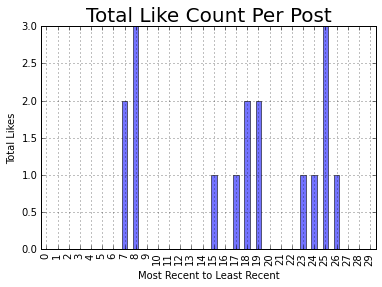

In [23]:
df_2['Likes Count'].plot(kind='bar', alpha=.55)
plt.title("Total Like Count Per Post", fontsize=20)
plt.xlabel('Most Recent to Least Recent')
plt.ylabel('Total Likes')

The graph above indexes at 0. That is the most recent post for the hashtag 'nyc' that was posted. The y-axis is responsible for how many likes each photos gets. 